In [1]:
import pandas as pd

In [157]:
df_users=pd.read_csv("users.csv", header=None, names=["User","AIKnowledge","XAIKnowledge"])

In [158]:
df_users=df_users.drop_duplicates(subset="User",keep="last")
df_users=df_users.drop(index=14) #outlier
len(df_users.index)

68

In [4]:
df_votes=pd.read_csv("votes.csv", header=None, names=["User","Image","Exp1","Exp2","Exp3","Selected"])

In [5]:
df_votes=df_votes.drop_duplicates(subset=["User","Image"],keep="last")

In [6]:
df_votes["User"].nunique()

62

In [7]:
df_votes["Selected"].value_counts()

SSIMNearestNeighbours     234
NearestNeighbours         219
KernelShap                121
Lime                      117
InSampleCFs               117
VarGrad                    44
Rise                       34
SmoothGrad                 33
GradCAMPP                  33
HsicAttributionMethod      32
SquareGrad                 32
SobolAttributionMethod     30
GuidedBackprop             15
GradientInput              11
IntegratedGradients        11
Saliency                    8
Occlusion                   6
Name: Selected, dtype: int64

In [8]:
df_votes

,User,Image,Exp1,Exp2,Exp3,Selected
0,te95oqfbevus8jhlq3klf559ld,0d2be6df4e1b47cd0a5cae1a738da7ebd725328b.jpeg,KernelShap,SmoothGrad,NearestNeighbours,KernelShap
1,te95oqfbevus8jhlq3klf559ld,2b11585d8f8e812f132d576caa710c72fdaf6b95.jpeg,InSampleCFs,SmoothGrad,KernelShap,InSampleCFs
2,te95oqfbevus8jhlq3klf559ld,319ace1399ee4f529f9e2809b92a3b3c12fb9ed8.jpeg,NearestNeighbours,Lime,Saliency,NearestNeighbours
3,te95oqfbevus8jhlq3klf559ld,4937cfae05416563ff976eb79dad6071d2222606.jpeg,Lime,NearestNeighbours,HsicAttributionMethod,Lime
4,te95oqfbevus8jhlq3klf559ld,6649143d6d6f4e42f23ea1100e5862ec32b71d6b.jpeg,SSIMNearestNeighbours,VarGrad,KernelShap,SSIMNearestNeighbours
...,...,...,...,...,...,...
1142,0254mkjsp343oa4hsig664fkqj,f81aea1c65e9821901c13ea6dd482ce0638d8b0e.jpeg,InSampleCFs,KernelShap,IntegratedGradients,KernelShap
1143,0254mkjsp343oa4hsig664fkqj,1e61fe2b39a6fe93be89a947ac93ed15c84b7744.jpeg,GuidedBackprop,Lime,SSIMNearestNeighbours,Lime
1144,0254mkjsp343oa4hsig664fkqj,38b4909ef866cfddd87f9e4d9e6c4cd29a4baaea.jpeg,SSIMNearestNeighbours,Lime,SmoothGrad,SmoothGrad
1145,0254mkjsp343oa4hsig664fkqj,78caed38adf326cea37f03960d804283fe5f9164.jpeg,NearestNeighbours,KernelShap,SmoothGrad,SmoothGrad


In [224]:
val1=df_votes["Exp1"].value_counts()
val2=df_votes["Exp2"].value_counts()
val3=df_votes["Exp3"].value_counts()
total_reps=val1+val2+val3
total_votes=df_votes["Selected"].value_counts()
perc_selected=(total_votes/total_reps).sort_values(ascending=False)
perc_selected

NearestNeighbours         0.647929
SSIMNearestNeighbours     0.606218
VarGrad                   0.440000
Rise                      0.400000
GradCAMPP                 0.366667
HsicAttributionMethod     0.363636
SquareGrad                0.359551
SobolAttributionMethod    0.329670
SmoothGrad                0.323529
InSampleCFs               0.313673
KernelShap                0.224907
Lime                      0.209302
GuidedBackprop            0.185185
GradientInput             0.132530
IntegratedGradients       0.108911
Saliency                  0.085106
Occlusion                 0.064516
dtype: float64

### Metrics for attribution-based explanations

In [50]:

insertion_df=pd.read_csv("Insertion.csv").rename(columns={'Unnamed: 0':"Image"})
deletion_df=pd.read_csv("Deletion.csv").rename(columns={'Unnamed: 0':"Image"})
mufidelity_df=pd.read_csv("MuFidelity.csv").rename(columns={'Unnamed: 0':"Image"})
stability_df=pd.read_csv("AverageStability.csv").rename(columns={'Unnamed: 0':"Image"})

In [51]:
avginsertion_df=insertion_df.mean(numeric_only=True).sort_values()
avgdeletion_df=deletion_df.mean(numeric_only=True).sort_values()
avgmufidelity_df=mufidelity_df.mean(numeric_only=True).sort_values()
avgstability_df=stability_df.mean(numeric_only=True).sort_values()

In [52]:
avgmetrics_df=pd.concat([perc_selected, avginsertion_df,avgdeletion_df,avgmufidelity_df,avgstability_df], axis=1).dropna()
avgmetrics_df.columns=["Selection Ratio","Insertion","Deletion","MuFidelity","Stability"]
avgmetrics_df

,Selection Ratio,Insertion,Deletion,MuFidelity,Stability
VarGrad,0.440000,0.789958,0.211112,0.212737,8.859600e-02
Rise,0.400000,0.746811,0.304831,0.023920,6.152950e+06
GradCAMPP,0.366667,0.768236,0.215675,0.021444,3.863555e+00
HsicAttributionMethod,0.363636,0.762056,0.176757,0.069392,1.594610e+05
SquareGrad,0.359551,0.793090,0.207567,0.262144,8.502121e-02
SobolAttributionMethod,0.329670,0.767557,0.174904,0.024143,4.424653e+02
SmoothGrad,0.323529,0.281387,0.419294,-0.020835,1.760314e+00
KernelShap,0.224907,0.816678,0.187025,0.054931,1.107853e+02
Lime,0.209302,0.842193,0.178556,0.051999,3.651269e+01
GuidedBackprop,0.185185,0.403801,0.472505,0.015398,2.155196e+04


In [53]:
avgmetrics_df.corr()

,Selection Ratio,Insertion,Deletion,MuFidelity,Stability
Selection Ratio,1.000000,0.611705,-0.033560,0.316850,0.330865
Insertion,0.611705,1.000000,-0.558152,0.370350,0.181983
Deletion,-0.033560,-0.558152,1.000000,-0.406293,0.179099
MuFidelity,0.316850,0.370350,-0.406293,1.000000,-0.144923
Stability,0.330865,0.181983,0.179099,-0.144923,1.000000


### Metrics for instance-based explanations

In [200]:
sparsity_df=pd.read_csv("sparsity.csv").rename(columns={'img':"Image"})
diversity_df=pd.read_csv("diversity.csv").rename(columns={'img':"Image"})
validity_df=pd.read_csv("validity.csv").rename(columns={'img':"Image"})

In [201]:
avgsparsity_df=sparsity_df.mean(numeric_only=True).sort_values()
avgdiversity_df=diversity_df.mean(numeric_only=True).sort_values()
avgvalidity_df=validity_df.mean(numeric_only=True).sort_values()

In [202]:
avgmetrics_df=pd.concat([perc_selected, avgsparsity_df,avgdiversity_df,avgvalidity_df], axis=1).dropna()
avgmetrics_df.columns=["Selection Ratio","Sparsity","Diversity","Validity"]
avgmetrics_df

,Selection Ratio,Sparsity,Diversity,Validity
NearestNeighbours,0.647929,0.558019,0.422605,0.500000
SSIMNearestNeighbours,0.606218,0.634518,0.397708,0.500000
InSampleCFs,0.313673,0.478109,0.581117,0.516667


In [203]:
avgmetrics_df.corr()

,Selection Ratio,Sparsity,Diversity,Validity
Selection Ratio,1.000000,0.810517,-0.971287,-0.993423
Sparsity,0.810517,1.000000,-0.926593,-0.872253
Diversity,-0.971287,-0.926593,1.000000,0.992140
Validity,-0.993423,-0.872253,0.992140,1.000000


### User Profiles

In [159]:
user_selections_df=df_votes
user_selections_df

,User,Image,Exp1,Exp2,Exp3,Selected
0,te95oqfbevus8jhlq3klf559ld,0d2be6df4e1b47cd0a5cae1a738da7ebd725328b.jpeg,KernelShap,SmoothGrad,NearestNeighbours,KernelShap
1,te95oqfbevus8jhlq3klf559ld,2b11585d8f8e812f132d576caa710c72fdaf6b95.jpeg,InSampleCFs,SmoothGrad,KernelShap,InSampleCFs
2,te95oqfbevus8jhlq3klf559ld,319ace1399ee4f529f9e2809b92a3b3c12fb9ed8.jpeg,NearestNeighbours,Lime,Saliency,NearestNeighbours
3,te95oqfbevus8jhlq3klf559ld,4937cfae05416563ff976eb79dad6071d2222606.jpeg,Lime,NearestNeighbours,HsicAttributionMethod,Lime
4,te95oqfbevus8jhlq3klf559ld,6649143d6d6f4e42f23ea1100e5862ec32b71d6b.jpeg,SSIMNearestNeighbours,VarGrad,KernelShap,SSIMNearestNeighbours
...,...,...,...,...,...,...
1142,0254mkjsp343oa4hsig664fkqj,f81aea1c65e9821901c13ea6dd482ce0638d8b0e.jpeg,InSampleCFs,KernelShap,IntegratedGradients,KernelShap
1143,0254mkjsp343oa4hsig664fkqj,1e61fe2b39a6fe93be89a947ac93ed15c84b7744.jpeg,GuidedBackprop,Lime,SSIMNearestNeighbours,Lime
1144,0254mkjsp343oa4hsig664fkqj,38b4909ef866cfddd87f9e4d9e6c4cd29a4baaea.jpeg,SSIMNearestNeighbours,Lime,SmoothGrad,SmoothGrad
1145,0254mkjsp343oa4hsig664fkqj,78caed38adf326cea37f03960d804283fe5f9164.jpeg,NearestNeighbours,KernelShap,SmoothGrad,SmoothGrad


In [160]:
df_users=df_users.set_index("User")

In [161]:
user_selections_df["AIKnowledge"]=user_selections_df.apply(lambda x: df_users.loc[x["User"],"AIKnowledge"],axis=1)
user_selections_df["XAIKnowledge"]=user_selections_df.apply(lambda x: df_users.loc[x["User"],"XAIKnowledge"],axis=1)
user_selections_df["TKnowledge"]=user_selections_df["AIKnowledge"]+user_selections_df["XAIKnowledge"]

In [162]:
user_selections_df.sort_values("TKnowledge")

,User,Image,Exp1,Exp2,Exp3,Selected,AIKnowledge,XAIKnowledge,TKnowledge
650,ja7f2v7oosjmkod3l69vrrijmr,78caed38adf326cea37f03960d804283fe5f9164.jpeg,GradientInput,Lime,InSampleCFs,GradientInput,1,1,2
161,blc7bm8sn6p5iclesjijnljdb9,319ace1399ee4f529f9e2809b92a3b3c12fb9ed8.jpeg,KernelShap,IntegratedGradients,InSampleCFs,KernelShap,1,1,2
160,blc7bm8sn6p5iclesjijnljdb9,2b11585d8f8e812f132d576caa710c72fdaf6b95.jpeg,NearestNeighbours,Saliency,KernelShap,KernelShap,1,1,2
159,blc7bm8sn6p5iclesjijnljdb9,0d2be6df4e1b47cd0a5cae1a738da7ebd725328b.jpeg,InSampleCFs,Lime,IntegratedGradients,InSampleCFs,1,1,2
651,ja7f2v7oosjmkod3l69vrrijmr,6832bf7f44e9db4fbec1339014fc6245bbd5d20f.jpeg,VarGrad,NearestNeighbours,KernelShap,KernelShap,1,1,2
...,...,...,...,...,...,...,...,...,...
969,n39a7h6ltb0fh40ft6c7uhq18p,9628e7f7e3f9e89ad5c040e29523b78150da7cf1.jpeg,NearestNeighbours,KernelShap,HsicAttributionMethod,NearestNeighbours,5,5,10
970,n39a7h6ltb0fh40ft6c7uhq18p,9be6a4974aedf3133ae07d8265c5cd89a098644a.jpeg,Rise,Lime,SSIMNearestNeighbours,SSIMNearestNeighbours,5,5,10
971,n39a7h6ltb0fh40ft6c7uhq18p,b59e7d5f533c680b7e05fbf21b0f67c9f49d9867.jpeg,KernelShap,GuidedBackprop,SSIMNearestNeighbours,SSIMNearestNeighbours,5,5,10
961,n39a7h6ltb0fh40ft6c7uhq18p,319ace1399ee4f529f9e2809b92a3b3c12fb9ed8.jpeg,SSIMNearestNeighbours,Lime,HsicAttributionMethod,HsicAttributionMethod,5,5,10


In [163]:
user_selections_df=user_selections_df.sort_values("TKnowledge")
low_user_df=user_selections_df[user_selections_df['TKnowledge'] <=4]
medium_user_df=user_selections_df[(user_selections_df['TKnowledge'] > 4) & (user_selections_df['TKnowledge'] <=7)]
high_user_df=user_selections_df[user_selections_df['TKnowledge'] >7]

### Low Knowledge in AI/XAI

In [168]:
val1=low_user_df["Exp1"].value_counts()
val2=low_user_df["Exp2"].value_counts()
val3=low_user_df["Exp3"].value_counts()
total_reps=val1+val2+val3
total_votes=low_user_df["Selected"].value_counts()
perc_selected=(total_votes/total_reps).sort_values(ascending=False)
perc_selected

NearestNeighbours         0.745098
SSIMNearestNeighbours     0.652542
SmoothGrad                0.535714
InSampleCFs               0.410853
VarGrad                   0.406250
SquareGrad                0.333333
HsicAttributionMethod     0.321429
GuidedBackprop            0.258065
Rise                      0.208333
SobolAttributionMethod    0.200000
GradientInput             0.193548
Saliency                  0.185185
GradCAMPP                 0.178571
Lime                      0.175000
KernelShap                0.153439
IntegratedGradients       0.125000
Occlusion                 0.058824
dtype: float64

### Medium Knowledge in AI/XAI

In [177]:
val1=medium_user_df["Exp1"].value_counts()
val2=medium_user_df["Exp2"].value_counts()
val3=medium_user_df["Exp3"].value_counts()
total_reps=val1+val2+val3
total_votes=medium_user_df["Selected"].value_counts()
perc_selected=(total_votes/total_reps).sort_values(ascending=False).fillna(0)
perc_selected

NearestNeighbours         0.669355
SSIMNearestNeighbours     0.640288
HsicAttributionMethod     0.368421
Rise                      0.366667
InSampleCFs               0.358974
SquareGrad                0.333333
GradCAMPP                 0.310345
SobolAttributionMethod    0.307692
KernelShap                0.255556
VarGrad                   0.222222
Lime                      0.215000
SmoothGrad                0.166667
IntegratedGradients       0.142857
GuidedBackprop            0.115385
GradientInput             0.071429
Occlusion                 0.032258
Saliency                  0.000000
dtype: float64

### High Knowledge in AI/XAI

In [167]:
val1=high_user_df["Exp1"].value_counts()
val2=high_user_df["Exp2"].value_counts()
val3=high_user_df["Exp3"].value_counts()
total_reps=val1+val2+val3
total_votes=high_user_df["Selected"].value_counts()
perc_selected=(total_votes/total_reps).sort_values(ascending=False)
perc_selected

VarGrad                   0.718750
Rise                      0.580645
GradCAMPP                 0.575758
NearestNeighbours         0.535714
SSIMNearestNeighbours     0.527132
SobolAttributionMethod    0.457143
HsicAttributionMethod     0.409091
SquareGrad                0.400000
SmoothGrad                0.315789
KernelShap                0.272189
Lime                      0.231156
InSampleCFs               0.173228
GuidedBackprop            0.166667
GradientInput             0.125000
Occlusion                 0.107143
Saliency                  0.093750
IntegratedGradients       0.058824
dtype: float64

In [208]:
len(low_user_df)

349

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

user_distribution=pd.Series([len(high_user_df),len(medium_user_df),len(low_user_df)],index=["Expert","Competent","Novice"])

([<matplotlib.patches.Wedge at 0x2d3c4f65730>,
 [Text(0.543622143678241, 0.9562818438633425, 'Expert'),
  Text(-1.0983720224078293, -0.05982391153824084, 'Competent'),
  Text(0.5948253398276871, -0.9253014725476647, 'Novice')],
 [Text(0.29652116927904054, 0.521608278470914, '33.5%'),
  Text(-0.5991120122224523, -0.03263122447540409, '34.6%'),
  Text(0.3244501853605566, -0.504709894116908, '31.8%')])

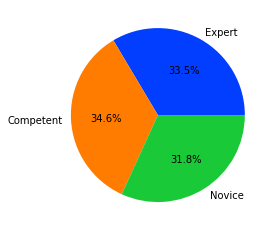

In [223]:
colors = sns.color_palette('bright')[0:3]

#create pie chart
plt.pie(user_distribution, labels = user_distribution.index, colors = colors, autopct='%.1f%%')

In [228]:
perc_selected.to_csv("total_perc.csv")

In [232]:
pd.DataFrame(perc_selected).transpose()

,NearestNeighbours,SSIMNearestNeighbours,VarGrad,Rise,GradCAMPP,HsicAttributionMethod,SquareGrad,SobolAttributionMethod,SmoothGrad,InSampleCFs,KernelShap,Lime,GuidedBackprop,GradientInput,IntegratedGradients,Saliency,Occlusion
0,0.647929,0.606218,0.44,0.4,0.366667,0.363636,0.359551,0.32967,0.323529,0.313673,0.224907,0.209302,0.185185,0.13253,0.108911,0.085106,0.064516
